## Неделя 2. Вторник

### Numpy. Часть 2

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn import set_config  # Добавляем импорт set_config

# Устанавливаем вывод преобразований в виде pandas DataFrame
set_config(transform_output='pandas')  # Теперь работает!

__great__ = 'Все круто!'

### 1.PCA

* Ниже приведен датасетзависимости роста и веса человека. 

In [249]:
df = pd.read_csv('aux/weight-height.csv')

In [250]:
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


__1.1__ Постройте scatterplot данной зависимости

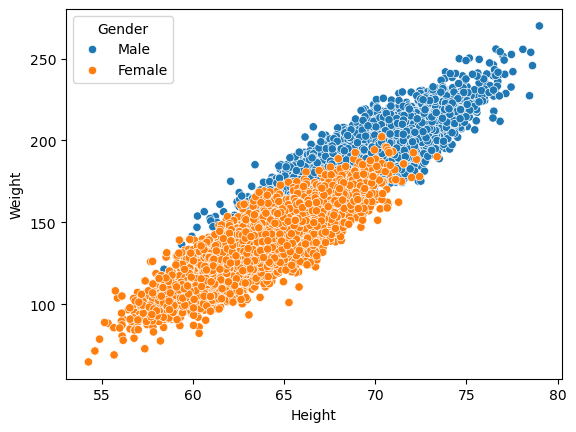

In [251]:
sns.scatterplot(x='Height', y='Weight', data=df, hue='Gender');

* Ответьте на вопрос, есть ли линейная зависимость данных(коллинеарность)

**-Да, положительная**

__1.2__ Сделайте понижение размерности с помощью [pca](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)(principal component analysis)

In [252]:
pca = PCA(n_components=1)
df1 = df.drop(columns=['Gender'])
pca.fit(df1)

PCA(n_components=1)

In [253]:
pca_df = pca.transform(df1)
pca_df

,pca0
0,80.787201
1,1.131254
2,51.841611
3,58.836057
4,45.022950
...,...
9995,-24.533757
9996,9.447169
9997,-33.039526
9998,2.691672


__1.3__ Отобразите, сколько процентов информации вы при этом сохранили

In [254]:
pca.explained_variance_ratio_

array([0.9979748])

In [255]:
pca.components_

array([[0.1103626 , 0.99389139]])

__1.4.__ Удовлетворителен ли результат?

**-Конечно, сохранено 99,8% информации**

In [256]:
df = pd.read_csv('SOLYaNKA.csv')

In [257]:
pca1 = PCA(n_components=18)
pca1.fit(df)

PCA(n_components=18)

In [258]:
pca1_df = pca1.transform(df)
pca1_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17
0,4.156305e+06,421819.680637,-1689.380482,-138.321760,16.789391,-2.030385,1.785679,-0.515209,0.623487,0.649728,-0.313368,0.019135,0.192524,0.197653,-0.650019,0.116769,3.418480e-12,-1.682805e-12
1,4.519274e+06,421788.962448,-1687.777150,-113.352293,16.823852,-1.705901,11.843706,-1.048779,0.647486,0.265645,-0.560573,-0.028004,-0.039609,0.233394,0.311440,0.053295,3.221524e-11,-1.273416e-11
2,4.058234e+06,421828.003306,-1689.699599,-138.266496,15.459780,-4.676063,-8.818449,2.005938,0.747383,0.043556,-0.125946,0.028749,-0.094127,0.243510,0.300485,0.004227,1.379439e-11,-5.475907e-12
3,5.082595e+06,318734.614750,-5510.140798,128.521830,18.610390,-13.601873,-8.401829,-3.788598,1.853113,0.114143,0.173638,0.059635,-0.040562,-0.133005,0.525302,0.038510,5.683496e-11,-2.239628e-11
4,6.499739e+06,149965.821616,42863.874786,1417.895163,32.646661,4.804916,-27.462074,4.814584,1.713113,-0.218650,0.507513,-0.672248,-0.187600,0.260100,-0.087091,0.076761,1.451569e-11,-5.966927e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19732,-5.154938e+07,-43057.896249,-9120.975225,342.962337,-15.593331,-8.328997,-4.523449,-0.604025,-3.341517,0.991682,-0.358367,0.668065,-0.260485,0.283955,-0.039987,0.132511,7.261267e-12,-2.884504e-12
19733,7.539952e+06,-40185.026729,13931.314244,-146.194442,-4.027811,-6.074064,13.793530,-1.942195,2.481882,0.461880,-0.383966,0.528688,-0.191915,0.283481,0.006452,0.180404,3.622668e-11,-1.418725e-11
19734,1.565018e+06,-38912.489035,-6686.895282,181.553236,-10.174184,-8.363455,5.965798,-0.580093,-2.449719,1.802132,-0.427940,-0.275483,-0.140823,0.295989,-0.030626,-0.064690,-4.536518e-11,1.799898e-11
19735,7.692634e+06,-34024.648637,-5254.800747,27.578884,-4.851198,2.351905,15.370737,3.396368,-1.794790,0.572853,-0.348345,-0.281345,-0.143141,-0.328671,-0.039386,0.012575,-1.542009e-11,6.113646e-12


In [259]:
pca.explained_variance_ratio_

array([0.9979748])

__1.5__ Попробуйте подгрузить свой обработанный датасет с проектом по циан. И проверить его на мультиколлинеарность с помощью _pca_.


Размер датасета: (19737, 18)

Первые 5 строк датасета:
   id_listing  number_of_rooms  metro_on_foot  area_m2  building_info   price  \
0   271271157                4              9      200              2  500000   
1   271634126                4              8      198              3  500000   
2   271173086                4              7      200              1  500000   
3   272197456                4              3      170              1  400000   
4   273614615                2              7       58              0  225000   

   renovation  bathroom  price_per_m2  price_per_room  metro_category  \
0           3         0   2500.000000        125000.0               1   
1           3         1   2525.252525        125000.0               1   
2           2         1   2500.000000        125000.0               1   
3           2         1   2352.941176        100000.0               0   
4           2         0   3879.310345        112500.0               1   

   is_walk_distance

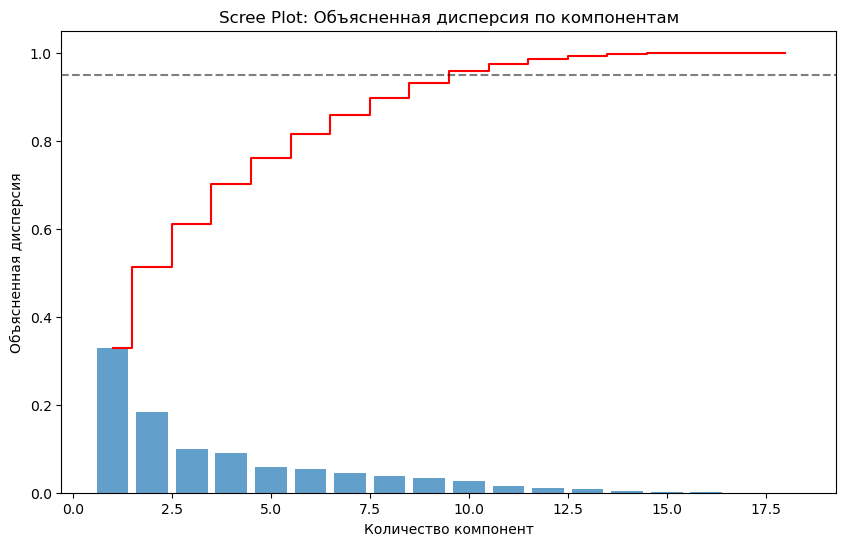

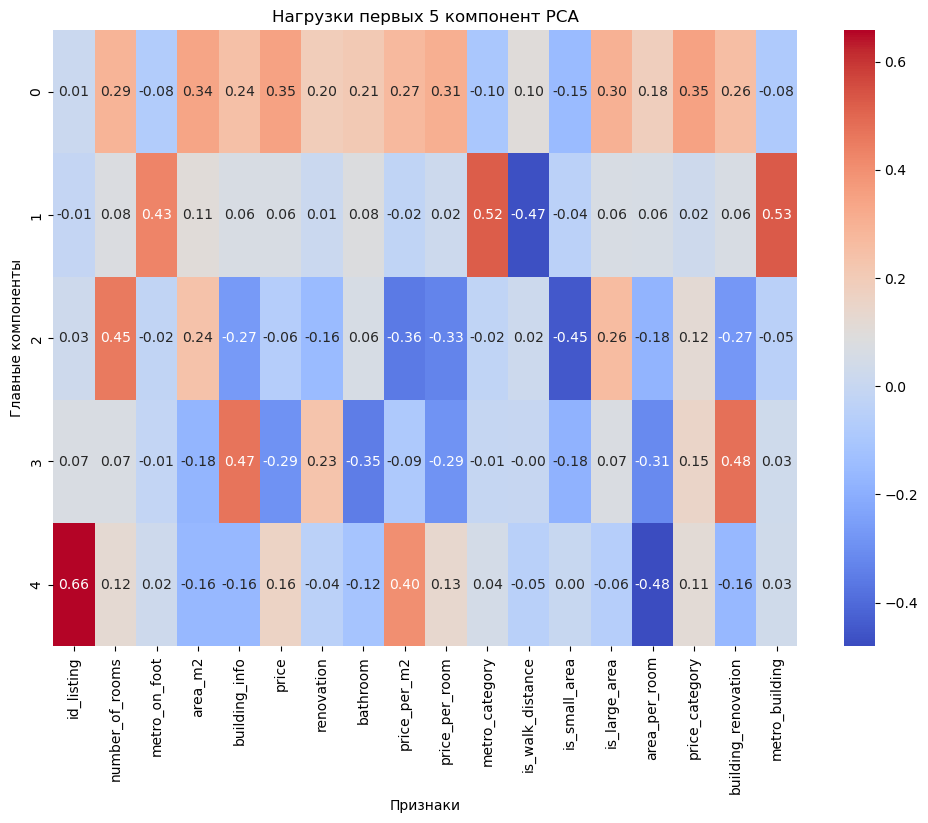

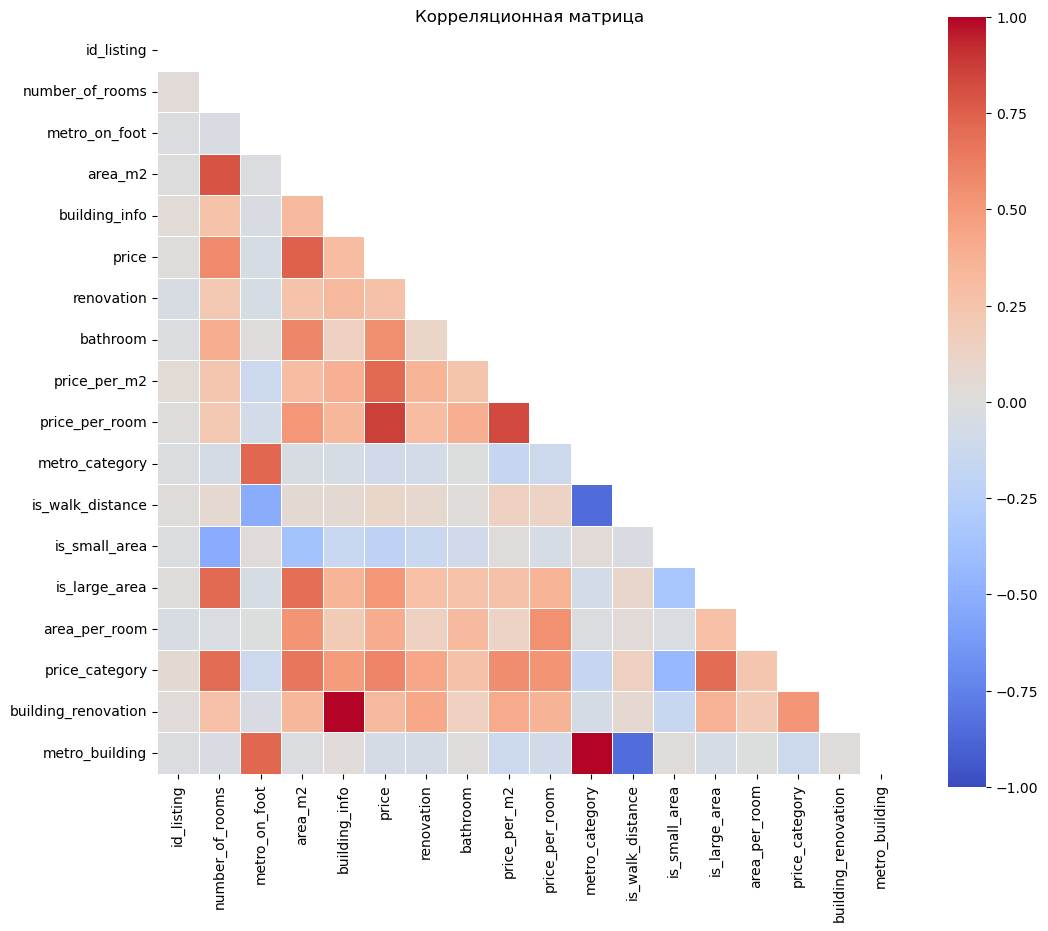


Признаки с высокой корреляцией (>0.7):
number_of_rooms и area_m2: 0.7907
number_of_rooms и is_large_area: 0.7178
metro_on_foot и metro_category: 0.7209
metro_on_foot и metro_building: 0.7190
area_m2 и price: 0.7491
building_info и building_renovation: 0.9937
price и price_per_m2: 0.7116
price и price_per_room: 0.8630
price_per_m2 и price_per_room: 0.8319
metro_category и is_walk_distance: -0.8532
metro_category и metro_building: 0.9967
is_walk_distance и metro_building: -0.8494
is_large_area и price_category: 0.7018


In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Загружаем датасет
df = pd.read_csv('SOLYaNKA.csv')

# Выведем информацию о датасете
print("Размер датасета:", df.shape)
print("\nПервые 5 строк датасета:")
print(df.head())

# Выбираем только числовые колонки для анализа
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_columns]

print("\nЧисловые колонки для анализа:", list(numeric_columns))

# Стандартизируем данные (важно для PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применяем PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Анализ объясненной дисперсии
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Выводим объясненную дисперсию каждой компоненты
print("\nОбъясненная дисперсия по компонентам:")
for i, var in enumerate(explained_variance[:10]):  # Показываем первые 10 компонент
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} накопленной)")

# Визуализация объясненной дисперсии
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.step(range(1, len(explained_variance) + 1), cumulative_variance, where='mid', color='red')
plt.axhline(y=0.95, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Количество компонент')
plt.ylabel('Объясненная дисперсия')
plt.title('Scree Plot: Объясненная дисперсия по компонентам')
plt.show()

# Анализ мультиколлинеарности через нагрузки компонент
components = pd.DataFrame(pca.components_, columns=numeric_columns)

# Тепловая карта нагрузок компонент
plt.figure(figsize=(12, 8))
sns.heatmap(components.iloc[:5], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Нагрузки первых 5 компонент PCA')
plt.xlabel('Признаки')
plt.ylabel('Главные компоненты')
plt.show()

# Корреляционная матрица
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=False, mask=mask, cmap='coolwarm',
            vmax=1, vmin=-1, center=0, square=True, linewidths=.5)
plt.title('Корреляционная матрица')
plt.show()

# Выводим пары признаков с высокой корреляцией (>0.7)
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print("\nПризнаки с высокой корреляцией (>0.7):")
for feat1, feat2, corr in high_corr:
    print(f"{feat1} и {feat2}: {corr:.4f}")

### 2.SVD

2.1 Для тех, кто уже сделал все. Можно попробовать ощутить прелесть SVD в Изображениях :)
1. Выберите любую черно-белую картинку
2. Подгрузите ее в питон.
3. Посмотрите, какого у вас размера матрица изображения
4. Отобразите изображение в питоне
5. Разложите матрицу по SVD, как в нашем примере из лекции сегодня
6. Выберите топ k сингулярных чисел и схлопните матрицу обратно
7. Посмотрите результат
8. Выберите минимальный k при котором картинка еще все так же различима
9. Какую долю этот k составляет от всех сингулярных чисел
10. Обернуть в стримлит-приложение, с интерфейсом, в котором пользователь может подгрузить свою картинку и выбрать ко-во сингулярных чисел. В ответ получить сжатый вариант

#### 3. Продолжение закрепления NumPy

 __3.1__ Создайте массив из 20 нулей и замените 0-е, 5-е, 10-е, 15-е значения на 999

In [261]:
res = np.array([999., 0., 0., 0., 0.,
                999., 0., 0., 0., 0.,
                999., 0., 0., 0., 0.,
                999., 0., 0., 0., 0.])

# ваш код:
zeros = np.zeros((20))
# zeros[0] = 999
# zeros[5] = 999
# zeros[10] = 999
# zeros[15] = 999
#Или так
zeros[np.array([0, 5, 10, 15])] = 999
zeros

array([999.,   0.,   0.,   0.,   0., 999.,   0.,   0.,   0.,   0., 999.,
         0.,   0.,   0.,   0., 999.,   0.,   0.,   0.,   0.])

In [262]:
# проверка должна выдать True и тогда print выдаст своё сообщение
assert np.allclose(zeros, res)
print(__great__)

Все круто!


__3.2__ Посчитайте минимум и максимум по строкам

In [306]:
x = np.arange(4).reshape((2, 2))

In [307]:
x

array([[0, 1],
       [2, 3]])

In [308]:
x_min = np.min(x, axis=1)
x_max = np.max(x, axis=1, keepdims=True)

In [309]:
x_min, x_max

(array([0, 2]),
 array([[1],
        [3]]))

In [310]:
# проверка

assert np.allclose(x_min, np.array([0, 2]))
assert np.allclose(x_max, np.array([[1], [3]]))

print(__great__)

Все круто!


❓Посмотрите на результат выполнения функции `np.allclose` в 0 и 1 заданиях. Что она делает?

> ответ тут

__3.3__ Посчитайте 75-й перцентиль по строкам.

In [322]:
x = np.arange(1, 11).reshape((2, 5))

# ваш код
print(x)

percentile_75 = np.percentile(x, 75, axis=1)
percentile_75

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


array([4., 9.])

In [323]:
# проверка

assert np.allclose(percentile_75, np.array([4., 9.]))

print(__great__)

Все круто!


__3.4__ Посчитайте двумя способами среднее взвешенное

In [325]:
x = np.arange(5)
weights = np.arange(1, 6) # веса

In [327]:
x = np.arange(5)
weights = np.arange(1, 6) # веса

print(x)

# ваш код
res1 = np.average(x, weights=weights)
res2 = np.sum(x * weights) / np.sum(weights)

assert np.allclose(res1, res2)
print(__great__)

[0 1 2 3 4]
Все круто!


__3.5__ Найдите среднее, стандартное отклонение (среднеквадратическое отклонение) и дисперсию

In [328]:
x = np.arange(1, 7)
print(x)

[1 2 3 4 5 6]


In [331]:
# ваш код
# посчитайте двумя способами каждое значение

out1 = np.mean(x)
out2 = np.sum(x) / len(x)
assert np.allclose(out1, out2)
print("mean=\n", out1)

out3 = np.std(x)
out4 = np.sqrt(np.var(x))
assert np.allclose(out3, out4)
print("std=\n", out3)

out5 = np.var(x)
out6 = np.sum((x - out1) ** 2) / len(x)
assert np.allclose(out5, out6)
print("variance=\n", out5)

print(__great__)

mean=
 3.5
std=
 1.707825127659933
variance=
 2.9166666666666665
Все круто!


__3.6__ Создайте новый массив из исходного, путем повторения

In [380]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])


res = np.array([[1, 2, 3, 1, 2, 3, 1, 2, 3],
                [4, 5, 6, 4, 5, 6, 4, 5, 6],
                [7, 8, 9, 7, 8, 9, 7, 8, 9]])

In [381]:
# ваш код
res = np.repeat(x, 3, axis=1)
res

array([[1, 1, 1, 2, 2, 2, 3, 3, 3],
       [4, 4, 4, 5, 5, 5, 6, 6, 6],
       [7, 7, 7, 8, 8, 8, 9, 9, 9]])

In [382]:
assert np.allclose(x3, res)
print(__great__)

Все круто!


__3.7__ Создайте из массива новый numpy массив уникальных значений и индексов

Дан numpy массив (*оригинальный*) с несколькими повторяющимися значениями элементов. Нужно создать **новый** массив, который содержит только уникальные значения. А также массив индексов **нового** массива, который позволит воссоздать *оригинальный*.

In [ ]:
x = np.array([1, 2, 6, 4, 2, 3, 2])

In [ ]:
# пример ответов
unique_elements = np.array([1, 2, 3, 4, 6])
reconstruction_indices = np.array([0, 1, 4, 3, 1, 2, 1])

# ваш код

# ...
# unique_elements =
# reconstruction_indices =


assert np.allclose(unique_elements[reconstruction_indices], x)
print(__great__)

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "numpy tasks in progress"`
4. Выполни команду `git push`

Выполни в ячейке ниже команду `!git status`

__3.8__ Найдите "разницу" между двумя массивами

In [ ]:
x = np.array([0, 1, 2, 5, 0])
y = np.array([0, 1, 4])

In [ ]:
res = np.array([2, 5])
out = # ваш код

assert np.allclose(res, out)
print(__great__)

__3.10__ Найдите разницу между каждым следующим элементом массива и предыдущм

In [ ]:
x = np.array([1, 2, 4, 7, 0])
diff = np.array([1, 2, 3, -7]) # 2-1, 4-2, 7-3, 0-7

In [ ]:
# ваш код
out = 0

assert np.allclose(diff, out)
print(__great__)

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "numpy2 tasks completed"`
4. Выполни команду `git push`